![alt](https://research.utm.my/wp-content/uploads/sites/26/2022/06/logo-300x122.png)
# Center for Artificial Intelligence and Robotics
#### Universiti Teknologi Malaysia


### ANN Classification

*Author: Dr. Ibrahim, Azzam, Thaqif & Syahmi*

**PIMA Dataset**

**Import Package**

In [61]:
import io
import pandas as pd

time: 719 μs (started: 2025-07-08 03:49:59 +00:00)


**Install Package and Obtain Processing Time**

In [63]:
!pip install ipython-autotime

Looking in indexes: http://jetson.webredirect.org/jp6/cu122
time: 3.72 s (started: 2025-07-08 03:50:03 +00:00)


In [64]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.91 ms (started: 2025-07-08 03:50:12 +00:00)


**Download PIMA dataset**

In [65]:
import os
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)

#Define the output path and create directories if they don't exist
output_dir = 'dataset'
output_path = os.path.join(output_dir, 'pima_indians_diabetes.csv')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the dataset as a CSV file
df.to_csv(output_path, index=False)

print(f"Dataset saved to {output_path}")

Dataset saved to dataset/pima_indians_diabetes.csv
time: 479 ms (started: 2025-07-08 03:50:16 +00:00)


**Read data in pandas and Display the first few lines of data .csv**

In [66]:
sample_df = pd.read_csv('dataset/pima_indians_diabetes.csv', header=0)

time: 11.6 ms (started: 2025-07-08 03:50:24 +00:00)


In [67]:
sample_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


time: 28.2 ms (started: 2025-07-08 03:50:28 +00:00)


**Define the input, X and label as Y**

In [68]:
import torch
dataset = sample_df.values
X = dataset[:,0:8].astype(float)
Y = dataset[:,8]

# Print the NumPy arrays
print("NumPy X:", X)
print("NumPy Y:", Y)

# Step 4: Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1) # Y_tensor is reshaped to ensure compatibility with the model's output and loss calculation


# Print the PyTorch tensors
print("PyTorch X_tensor:", X_tensor)
print("PyTorch Y_tensor:", Y_tensor)

NumPy X: [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
NumPy Y: [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0

**Import Package for Pytorch to design ANN**

In [69]:
!pip install scikit-learn -i https://pypi.org/simple

time: 3.59 s (started: 2025-07-08 03:50:44 +00:00)


In [70]:
!pip install matplotlib

Looking in indexes: http://jetson.webredirect.org/jp6/cu122
time: 3.61 s (started: 2025-07-08 03:50:52 +00:00)


In [71]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


time: 3.82 ms (started: 2025-07-08 03:51:01 +00:00)


In [72]:
# Define model parameters
input_dim = 8
hidden_dim1 = 12
hidden_dim2 = 8
hidden_dim3 = 4
output_dim = 1
num_epochs = 500
batch_size = 10
learning_rate = 0.001

time: 2.14 ms (started: 2025-07-08 03:51:06 +00:00)


**Create Class for dataset and dataloader**

DataLoader is a fundamental part of the data loading utility that makes it easier to iterate over batches of data.



In [73]:
class DiabetesDataset(Dataset):
    def __init__(self, data):
        # In the initialization method, we define how to load our dataset.
        # Here, we use data.drop() to identify and exclude the 'Outcome' column, extracting features and labels.
        self.features = torch.tensor(data.drop('Outcome', axis=1).values, dtype=torch.float32)
        self.labels = torch.tensor(data['Outcome'].values, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

time: 3.12 ms (started: 2025-07-08 03:51:11 +00:00)


In [74]:
import torch
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split

# Assuming DiabetesDataset and sample_df are defined properly
diabetes_dataset = DiabetesDataset(sample_df)

# Define the sizes of the splits
total_size = len(diabetes_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

# Split the dataset into train, validation, and test sets
train_data, temp_data = random_split(diabetes_dataset, [train_size, val_size + test_size])
val_data, test_data = random_split(temp_data, [val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

time: 14.5 ms (started: 2025-07-08 03:51:16 +00:00)


**Create ANN Model**

In [75]:
# Define the PyTorch model
class ANNModel(nn.Module):
    #def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        #initialize each layer
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()  
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.ReLU()       
        self.fc4 = nn.Linear(hidden_dim3, output_dim)
        self.sigmoid = nn.Sigmoid()
        #create and arrange ANN layer
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

time: 4.6 ms (started: 2025-07-08 03:51:22 +00:00)


In [56]:
# Initialize the neural network
#model = ANNModel(input_dim, hidden_dim1, hidden_dim2, output_dim)
model = ANNModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Print the model architecture
print(model)

ANNModel(
  (fc1): Linear(in_features=8, out_features=12, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=8, out_features=4, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
time: 9.65 ms (started: 2025-07-08 03:48:01 +00:00)


**Path to save the model**

In [76]:
# Define the path to save the model
model_path = 'model/pima_model_KV.pt'

time: 1.3 ms (started: 2025-07-08 03:51:44 +00:00)


**Define Optimizer and Loss Function for Training Phase**

In [77]:
# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    predicted = outputs.round()
    correct = (predicted == labels).float().sum()
    accuracy = correct / labels.size(0)
    return accuracy.item()

# Set the seed for reproducibility
torch.manual_seed(7)
np.random.seed(7)

time: 9.18 ms (started: 2025-07-08 03:51:47 +00:00)


In [78]:
# Initialize lists to store loss and accuracy
epoch_losses = []
epoch_accuracies = []
val_accuracies = []
val_losses = []
best_val_accuracy = 0.0
model.train()#Start Training
# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0.0
    epoch_accuracy = 0.0
    for i, (input, labels) in enumerate(train_loader):  # Renamed 'features' to 'input'
        # Forward pass
        outputs = model(input)

        # Reshape labels to match the shape of model outputs and convert to Float
        labels = labels.unsqueeze(1).float()  # Add an extra dimension and convert to Float

        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad() #clear previous gradient
        loss.backward() #compute gradient from current loss
        optimizer.step()#update model parameter

        # Calculate batch accuracy
        accuracy = calculate_accuracy(outputs, labels)

        epoch_loss += loss.item()
        epoch_accuracy += accuracy

    epoch_loss /= len(train_loader)
    epoch_accuracy /= len(train_loader)

    epoch_losses.append(epoch_loss)
    epoch_accuracies.append(epoch_accuracy)

    # Validation
    val_loss = 0.0  # Initialize validation loss variable
    val_accuracy = 0.0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for input_val, labels_val in val_loader:
            outputs_val = model(input_val)
            loss_val = criterion(outputs_val, labels_val.unsqueeze(1).float())  # Compute validation loss
            accuracy_val = calculate_accuracy(outputs_val, labels_val.unsqueeze(1).float())  # Adjust labels shape and convert to Float
            val_loss += loss_val.item()  # Accumulate validation loss
            val_accuracy += accuracy_val
        val_loss /= len(val_loader)  # Compute average validation loss
        val_losses.append(val_loss)  # Store validation loss
        val_accuracy /= len(val_loader)
        val_accuracies.append(val_accuracy)
    model.train()  # Set the model back to training mode

    # Save model if validation accuracy improves
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model_params = model.state_dict()
        torch.save(best_model_params, model_path)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


# Print final results
avg_loss = sum(epoch_losses) / len(epoch_losses)
print(f"Training complete. Average Loss: {avg_loss:.4f}, Best Validation Accuracy: {best_val_accuracy:.4f}")

Epoch [1/500], Loss: 0.4980, Accuracy: 0.7836, Validation Loss: 0.5203, Validation Accuracy: 0.7375
Epoch [2/500], Loss: 0.4792, Accuracy: 0.7669, Validation Loss: 0.4258, Validation Accuracy: 0.8083
Epoch [3/500], Loss: 0.4680, Accuracy: 0.7817, Validation Loss: 0.4720, Validation Accuracy: 0.7583
Epoch [4/500], Loss: 0.4473, Accuracy: 0.7894, Validation Loss: 0.4855, Validation Accuracy: 0.8083
Epoch [5/500], Loss: 0.4524, Accuracy: 0.7926, Validation Loss: 0.4721, Validation Accuracy: 0.7958
Epoch [6/500], Loss: 0.4465, Accuracy: 0.7918, Validation Loss: 0.4266, Validation Accuracy: 0.7833
Epoch [7/500], Loss: 0.4436, Accuracy: 0.7974, Validation Loss: 0.4958, Validation Accuracy: 0.7333
Epoch [8/500], Loss: 0.4234, Accuracy: 0.8077, Validation Loss: 0.4698, Validation Accuracy: 0.7708
Epoch [9/500], Loss: 0.4318, Accuracy: 0.7899, Validation Loss: 0.4995, Validation Accuracy: 0.7333
Epoch [10/500], Loss: 0.4300, Accuracy: 0.7947, Validation Loss: 0.4854, Validation Accuracy: 0.7458

**Prepare Data for evaluation**
# Answer for Question 1 - Prediction

In [79]:
# testing
dtest = X[400,0:8]
dtest = np.expand_dims(dtest, axis=0)

# Assuming 'model' is your trained model and 'X' is your dataset
dtest = X[400, 0:8]
dtest = np.expand_dims(dtest, axis=0)  # Add batch dimension


# Convert dtest to a torch tensor and float type
dtest_tensor = torch.tensor(dtest, dtype=torch.float32)

# Set the model to evaluation mode
model.eval()

# Get predictions
with torch.no_grad():
    predictions = model(dtest_tensor)

# Since you're dealing with binary classification, assume sigmoid activation in the output layer
score = predictions[0].item()

# Calculate probabilities for each class
other = 1 - score
val = np.array([score, other])

# Get the predicted class (0 or 1)
classes = np.argmax(val)

print(
    "This sample is %.2f percent Diabetic and %.2f percent NotDiabetic."
    % (100 * score, 100 * other)
)  # Will print on the Console

print("The predicted class is: ", classes)

This sample is 28.80 percent Diabetic and 71.20 percent NotDiabetic.
The predicted class is:  1
time: 6.22 ms (started: 2025-07-08 03:54:49 +00:00)


**Obtain Training Info for Loss and Accuracy**
# Answer for Question 2 - Save the Model

In [80]:
# model is your variable that you have trained to save in model folder

## Answer Here ##
torch.save(model.state_dict(), model_path)

time: 8.5 ms (started: 2025-07-08 03:55:03 +00:00)


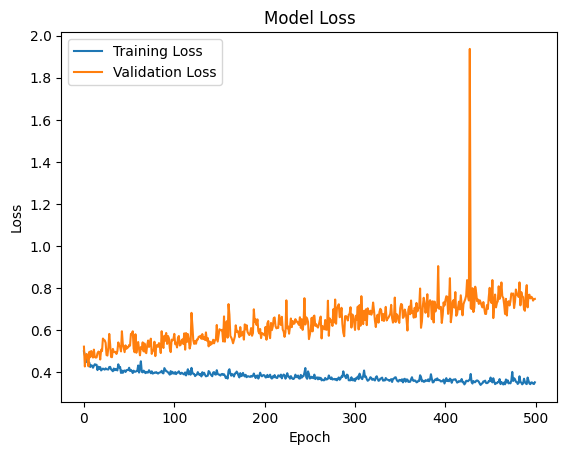

time: 440 ms (started: 2025-07-08 03:55:10 +00:00)


In [81]:
import matplotlib.pyplot as plt

# Assuming you have collected epoch_losses and val_losses during training and validation, respectively
plt.plot(epoch_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Answer for Question 3 - Plot The Model Accuracy

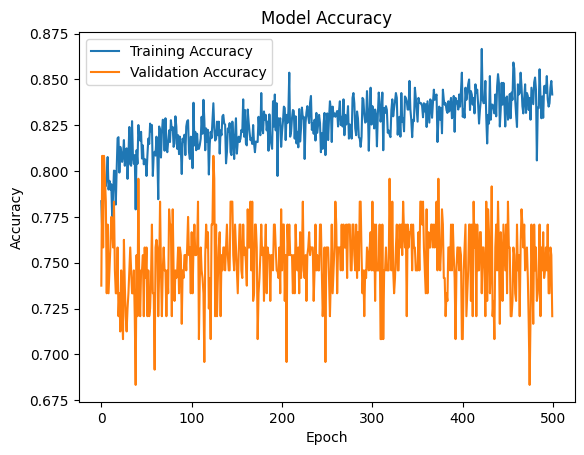

time: 334 ms (started: 2025-07-08 03:56:30 +00:00)


In [84]:
# Plot Accuracy Graph

plt.plot(epoch_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Serialize the Model to gdrive**

**Check the Model in the Working Folder in gdrive**
# Answer Question 4 - Load The Model

In [88]:
# Initialize your model instance
#loaded_model = ANNModel(input_dim, hidden_dim1, hidden_dim2, output_dim)
loaded_model = ANNModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

# Path to the saved model on Google Drive
model_path = 'model/pima_model_KV.pt'

# Load the state dictionary
## Answer Here ##
state_dict = torch.load(model_path)

# Load the state dictionary into the model
loaded_model.load_state_dict(state_dict)

# Set the model to evaluation mode
loaded_model.eval()




ANNModel(
  (fc1): Linear(in_features=8, out_features=12, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=8, out_features=4, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

time: 20.1 ms (started: 2025-07-08 04:00:15 +00:00)


# Answer Question 5 - Prediction on the Loaded Model




In [89]:
# Question 5
# Use the loaded model for prediction

# Assuming 'model' is your trained model and 'X' is your dataset
dtest = X[300, 0:8]
dtest = np.expand_dims(dtest, axis=0)  # Add batch dimension

# Convert dtest to a torch tensor and float type
dtest_tensor = torch.tensor(dtest, dtype=torch.float32)

# Set the model to evaluation mode
loaded_model.eval()

# Get predictions
with torch.no_grad():
    predictions = loaded_model(dtest_tensor)
    ## Answer Here ##

# Since you're dealing with binary classification, assume sigmoid activation in the output layer
score1 = predictions[0].item()

# Calculate probabilities for each class
other1 = 1 - score1
val1 = np.array([score1, other1])

# Get the predicted class (0 or 1)
classes1 = np.argmax(val1)


print(
    "This sample is %.2f percent Diabetic and %.2f percent NotDiabetic."
    % (100 * score1, 100 * other1)
)  # Will print on the Console

print("The predicted class is: ", classes1)

This sample is 97.13 percent Diabetic and 2.87 percent NotDiabetic.
The predicted class is:  0
time: 10.1 ms (started: 2025-07-08 04:00:36 +00:00)
